# PROJECT TEAM ID :PTID-CDS-APR-23-1492

## PROJECT ID :PRCP-1009-CellphonePrice

### Project members..
* Pavan kumar
* Ruchita
* Yokesh
* Divya
* Vignesh

## 1)Problem Statement

* Task 1:-Prepare a complete data analysis report on the given data.
* Task 2:-On the basis of the mobile Specification like Battery power, 3G enabled ,
wifi ,Bluetooth, Ram etc predict the Price range of the mobile.
* Task 3:- Prepare the analysis report stating how model will help expanding the
business by stating several factors including feature importance.

## 2) load the important libraries..

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet,LogisticRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor,AdaBoostRegressor,GradientBoostingRegressor,VotingRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost import XGBRegressor
from sklearn.neural_network import MLPRegressor
import tensorflow
from keras.models import Sequential
from keras.metrics import RootMeanSquaredError
from tensorflow.keras.layers import Convolution2D,MaxPool2D,Dense,Flatten
from sklearn.preprocessing import LabelEncoder,OneHotEncoder,StandardScaler,MinMaxScaler,RobustScaler
from sklearn.model_selection import train_test_split
import warnings # this library used to avoid the warnings..
warnings.filterwarnings("ignore")

## 3)load data..

In [2]:
#load the data
da=pd.read_csv("main.csv")
df=pd.DataFrame(da)
df.head(pd.set_option("display.max_columns",None))

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,five_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


## Domain analysis.

* The data contains information regarding mobile phone features, specifications etc and their price range. The various features and information can be used to predict the price range of a mobile phone.

* price range in continuous data (target variable).
    * 0 = 500 to 5000 (low price)
    * 1 = 5000 to 20000 (medium price)
    * 2 = 20000 to 50000 ( high price)
    * 3 = 50000 above (very high price)
##### above price range given for problem understaning purpose only,this not accurate range..
       * id:ID
       * battery_power:Total energy a battery can store in one time measured in mAh
       * blue:Has bluetooth or not
       * clock_speed:speed at which microprocessor executes instructions
       * dual_sim:Has dual sim support or not
       * fc:Front Camera mega pixels
       * four_g:Has 4G or not
       * int_memory:Internal Memory in Gigabytes
       * m_dep:Mobile Depth in cm
       * mobile_wt:Weight of mobile phone
       * n_cores:Number of cores of processor 
       * pc:Primary Camera mega pixels
       * px_height:Pixel Resolution Height
       * px_width:Pixel Resolution Width
       * ram:Random Access Memory in Megabytes
       * sc_h:Screen Height of mobile in cm
       * sc_w:Screen Width of mobile in cm
       * talk_time:longest time that a single battery charge will last when you are
       * five_g:Has 5G or not
       * touch_screen:Has touch screen or not
       * wifi:Has wifi or not


## 4)data analysis..

In [3]:
df.head()# select top 5 rows

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,five_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1


In [4]:
df.tail() # select bottom 5 rows

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,five_g,touch_screen,wifi,price_range
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0
1999,510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1,3


In [5]:
df.sample(4) # select randomly some rows

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,five_g,touch_screen,wifi,price_range
1696,1890,0,1.1,0,4,1,48,0.5,127,4,5,1438,1832,2392,10,4,15,1,0,1,3
817,918,0,0.9,1,1,0,8,0.1,123,7,5,653,671,1652,17,4,14,1,1,0,1
954,922,1,0.7,0,0,1,47,1.0,157,8,14,1295,1808,1464,17,4,12,1,0,1,1
1295,1347,0,1.5,1,10,0,56,0.3,95,1,19,398,1528,2456,13,0,13,1,1,1,2


In [6]:
#find the row and columns size
row,column=df.shape
print(row,"rows & ",column,"columns")

2000 rows &  21 columns


In [7]:
print("size :",df.size)

size : 42000


In [8]:
df.dtypes # all the column have numerical data..

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
five_g             int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   battery_power  2000 non-null   int64  
 1   blue           2000 non-null   int64  
 2   clock_speed    2000 non-null   float64
 3   dual_sim       2000 non-null   int64  
 4   fc             2000 non-null   int64  
 5   four_g         2000 non-null   int64  
 6   int_memory     2000 non-null   int64  
 7   m_dep          2000 non-null   float64
 8   mobile_wt      2000 non-null   int64  
 9   n_cores        2000 non-null   int64  
 10  pc             2000 non-null   int64  
 11  px_height      2000 non-null   int64  
 12  px_width       2000 non-null   int64  
 13  ram            2000 non-null   int64  
 14  sc_h           2000 non-null   int64  
 15  sc_w           2000 non-null   int64  
 16  talk_time      2000 non-null   int64  
 17  five_g         2000 non-null   int64  
 18  touch_sc

In [10]:
df.nunique().sort_values() # find the unique values in each features..

blue                2
touch_screen        2
dual_sim            2
four_g              2
five_g              2
wifi                2
price_range         4
n_cores             8
m_dep              10
sc_h               15
talk_time          19
sc_w               19
fc                 20
pc                 21
clock_speed        26
int_memory         63
mobile_wt         121
battery_power    1094
px_width         1109
px_height        1137
ram              1562
dtype: int64

In [11]:
df.columns # fina the all feature names.

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'five_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

## 5)Exploratory Data Analysis..

In [12]:
df.shape

(2000, 21)

## univariante analysis.

In [13]:
a=df.iloc[:,0:10]
b=df.iloc[:,10:22]
b.shape

(2000, 11)

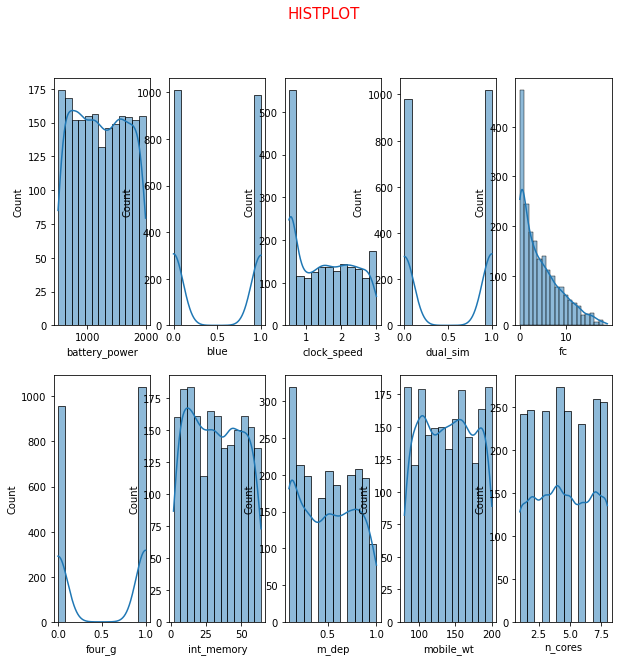

In [14]:
# hist  plot also used to check the data distributed in symmetrical or unsymmetrical data
plt.figure(figsize=(10,10))
no=1
for i in a:
    if no<=10:
        plt.suptitle("HISTPLOT",fontsize=15,color="red")
        plt.subplot(2,5,no)
        sns.histplot(x=a[i],kde=True)
        plt.xlabel(i)
    no+=1

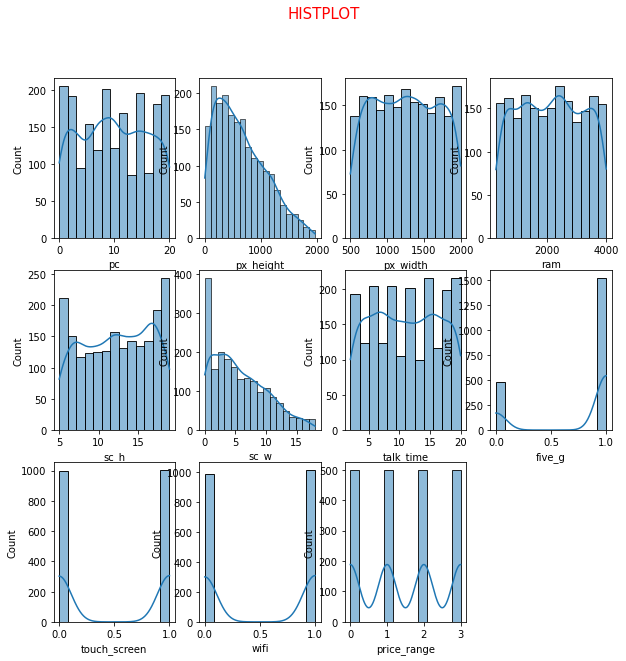

In [15]:
plt.figure(figsize=(10,10))
no=1
for i in b:
    if no<=12:
        plt.suptitle("HISTPLOT",fontsize=15,color="red")
        plt.subplot(3,4,no)
        sns.histplot(x=b[i],kde=True)
        plt.xlabel(i)
    no+=1

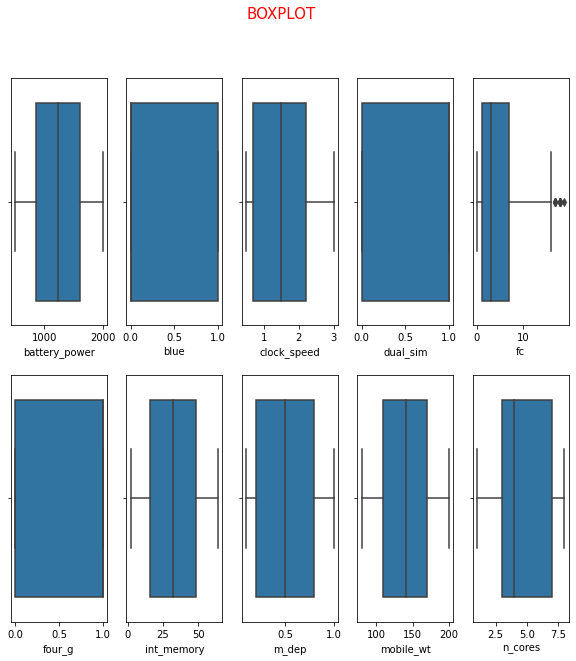

In [16]:
#boxplot also used to check the outlier.
plt.figure(figsize=(10,10))
no=1
for i in a:
    if no<=10:
        plt.suptitle("BOXPLOT",fontsize=15,color="red")
        plt.subplot(2,5,no)
        sns.boxplot(x=a[i])
        plt.xlabel(i)
    no+=1

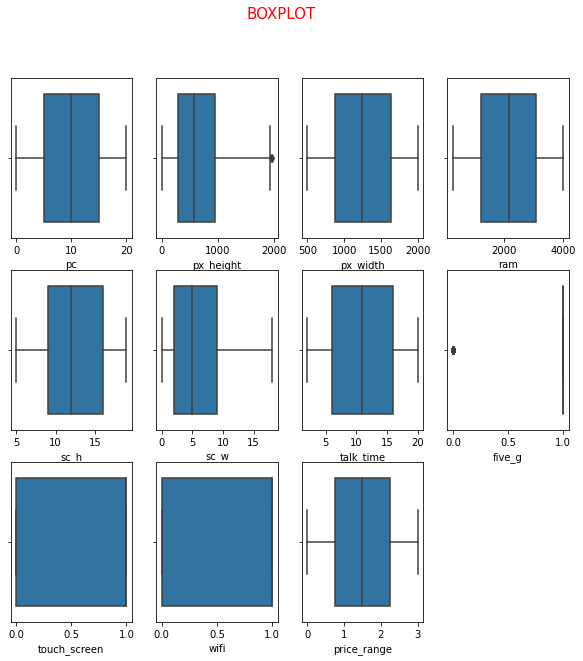

In [17]:
plt.figure(figsize=(10,10))
no=1
for i in b:
    if no<=12:
        plt.suptitle("BOXPLOT",fontsize=15,color="red")
        plt.subplot(3,4,no)
        sns.boxplot(x=b[i])
        plt.xlabel(i)
    no+=1

## bivariante analysis.

In [18]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'five_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

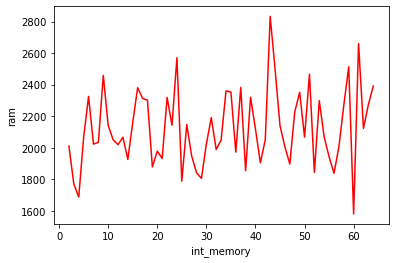

In [19]:
sns.lineplot(x="int_memory",y="ram",data=df,ci=None,color="red")
plt.show()

In [57]:
df["price_range"].value_counts()

1    500
2    500
3    500
0    500
Name: price_range, dtype: int64

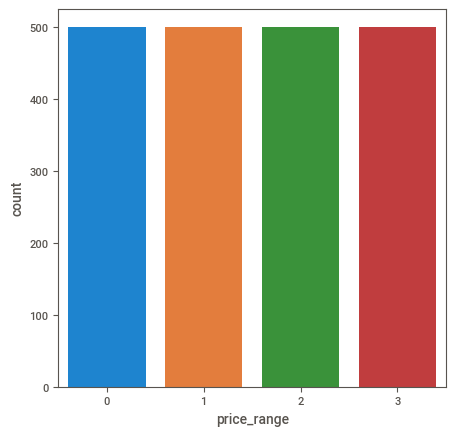

In [55]:
plt.figure(figsize=(5,5))
sns.countplot(x="price_range",data=df)
plt.show()

In [21]:
df.columns

Index(['battery_power', 'blue', 'clock_speed', 'dual_sim', 'fc', 'four_g',
       'int_memory', 'm_dep', 'mobile_wt', 'n_cores', 'pc', 'px_height',
       'px_width', 'ram', 'sc_h', 'sc_w', 'talk_time', 'five_g',
       'touch_screen', 'wifi', 'price_range'],
      dtype='object')

In [22]:
len(df.columns)

21

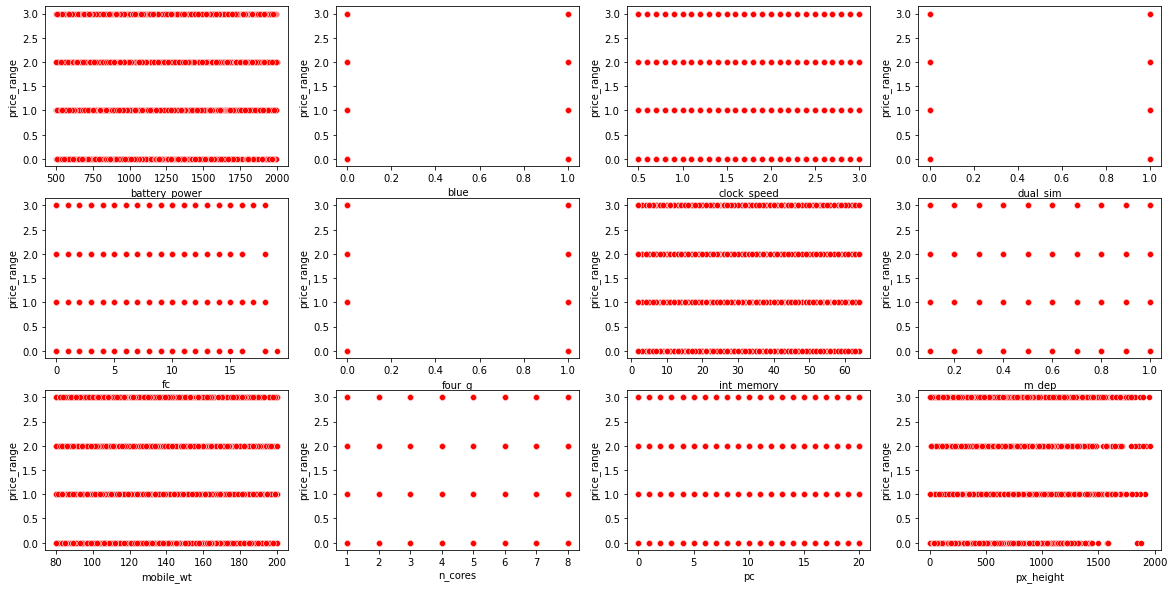

In [23]:
plt.figure(figsize=(20,10))
n=1
for i in df.columns:
    if n<=12:
        plt.subplot(3,4,n)
        sns.scatterplot(x=df[i],y="price_range",data=df,palette=["red","blue","green"],color="red")
        plt.xlabel(i)
    n+=1

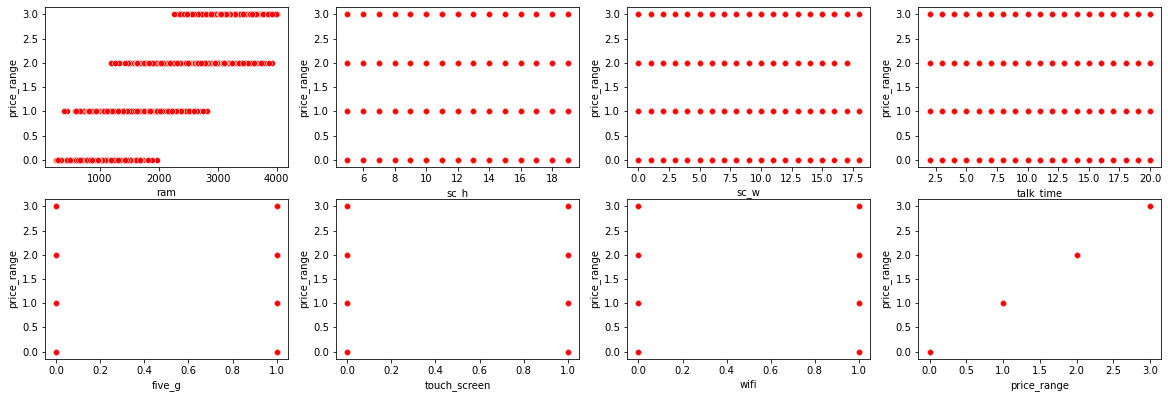

In [24]:
plt.figure(figsize=(20,10))
n=1
for i in df.columns[13:21]:
    if n<=12:
        plt.subplot(3,4,n)
        sns.scatterplot(x=df[i],y="price_range",data=df,palette=["red","blue","green"],color="red")
        plt.xlabel(i)
    n+=1

In [25]:
# heatmap- find the corelation between two variables..
c=df.corr()
c

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,five_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


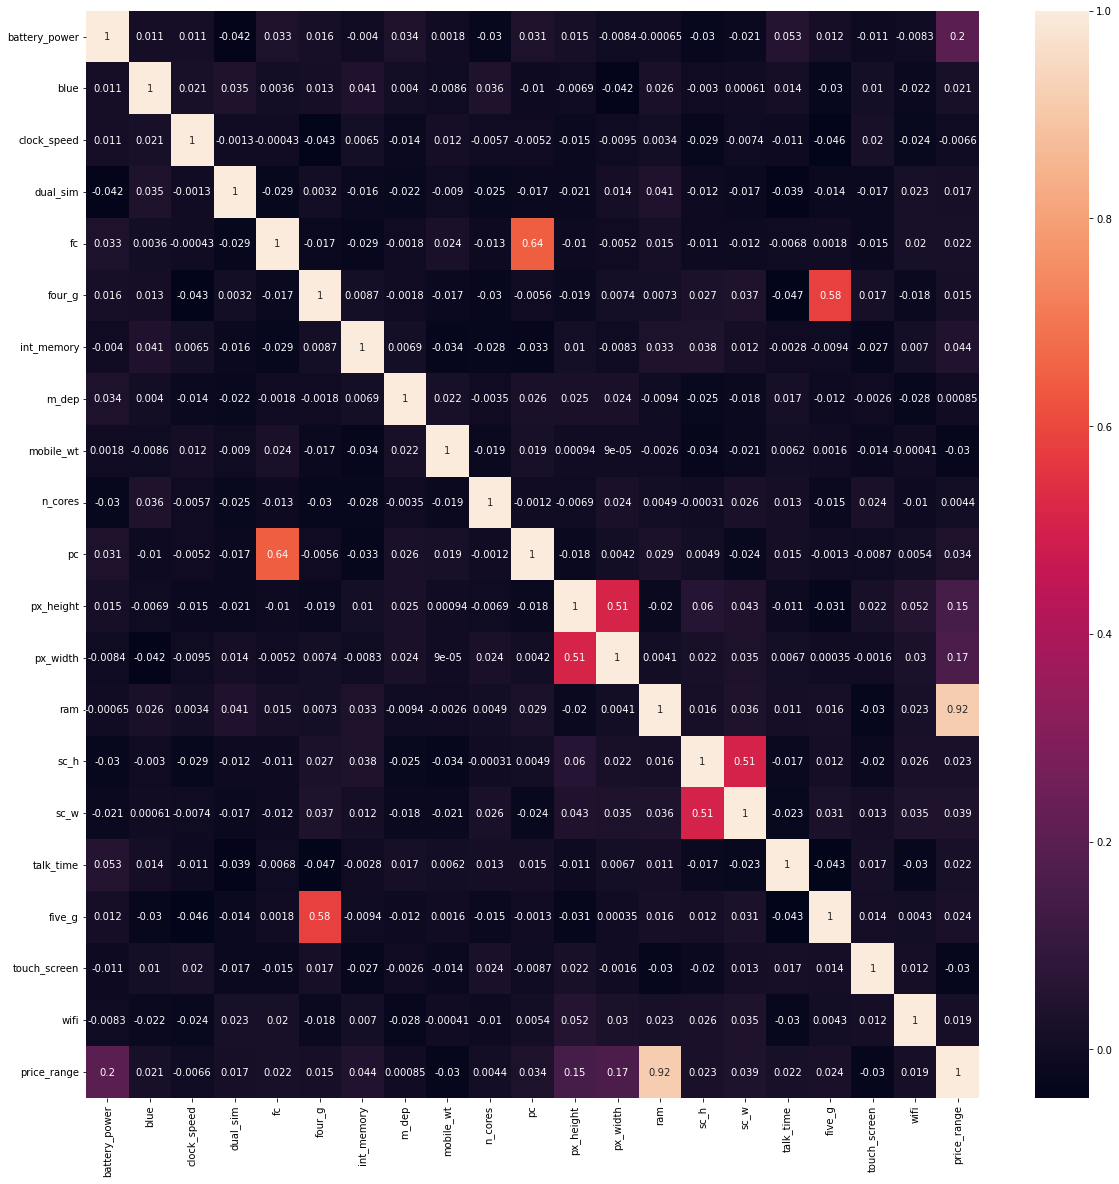

In [26]:
plt.figure(figsize=(20,20))
sns.heatmap(data=c,annot=True)
plt.show()

* this dataset is,
    * price range high core related in ram
    * price range less core related in mobile depth..


In [27]:
df.describe() # find the statistical analysis in given data.

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,five_g,touch_screen,wifi,price_range
count,2000.000000,2000.0000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000,2000.000000
mean,1238.518500,0.4950,1.522250,0.509500,4.309500,0.521500,32.046500,0.501750,140.249000,4.520500,9.916500,645.108000,1251.515500,2124.213000,12.306500,5.767000,11.011000,0.761500,0.503000,0.507000,1.500000
std,439.418206,0.5001,0.816004,0.500035,4.341444,0.499662,18.145715,0.288416,35.399655,2.287837,6.064315,443.780811,432.199447,1084.732044,4.213245,4.356398,5.463955,0.426273,0.500116,0.500076,1.118314
min,501.000000,0.0000,0.500000,0.000000,0.000000,0.000000,2.000000,0.100000,80.000000,1.000000,0.000000,0.000000,500.000000,256.000000,5.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000
25%,851.750000,0.0000,0.700000,0.000000,1.000000,0.000000,16.000000,0.200000,109.000000,3.000000,5.000000,282.750000,874.750000,1207.500000,9.000000,2.000000,6.000000,1.000000,0.000000,0.000000,0.750000
50%,1226.000000,0.0000,1.500000,1.000000,3.000000,1.000000,32.000000,0.500000,141.000000,4.000000,10.000000,564.000000,1247.000000,2146.500000,12.000000,5.000000,11.000000,1.000000,1.000000,1.000000,1.500000
75%,1615.250000,1.0000,2.200000,1.000000,7.000000,1.000000,48.000000,0.800000,170.000000,7.000000,15.000000,947.250000,1633.000000,3064.500000,16.000000,9.000000,16.000000,1.000000,1.000000,1.000000,2.250000
max,1998.000000,1.0000,3.000000,1.000000,19.000000,1.000000,64.000000,1.000000,200.000000,8.000000,20.000000,1960.000000,1998.000000,3998.000000,19.000000,18.000000,20.000000,1.000000,1.000000,1.000000,3.000000


In [28]:
df.corr()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,five_g,touch_screen,wifi,price_range
battery_power,1.000000,0.011252,0.011482,-0.041847,0.033334,0.015665,-0.004004,0.034085,0.001844,-0.029727,0.031441,0.014901,-0.008402,-0.000653,-0.029959,-0.021421,0.052510,0.011522,-0.010516,-0.008343,0.200723
blue,0.011252,1.000000,0.021419,0.035198,0.003593,0.013443,0.041177,0.004049,-0.008605,0.036161,-0.009952,-0.006872,-0.041533,0.026351,-0.002952,0.000613,0.013934,-0.030236,0.010061,-0.021863,0.020573
clock_speed,0.011482,0.021419,1.000000,-0.001315,-0.000434,-0.043073,0.006545,-0.014364,0.012350,-0.005724,-0.005245,-0.014523,-0.009476,0.003443,-0.029078,-0.007378,-0.011432,-0.046433,0.019756,-0.024471,-0.006606
dual_sim,-0.041847,0.035198,-0.001315,1.000000,-0.029123,0.003187,-0.015679,-0.022142,-0.008979,-0.024658,-0.017143,-0.020875,0.014291,0.041072,-0.011949,-0.016666,-0.039404,-0.014008,-0.017117,0.022740,0.017444
fc,0.033334,0.003593,-0.000434,-0.029123,1.000000,-0.016560,-0.029133,-0.001791,0.023618,-0.013356,0.644595,-0.009990,-0.005176,0.015099,-0.011014,-0.012373,-0.006829,0.001793,-0.014828,0.020085,0.021998
four_g,0.015665,0.013443,-0.043073,0.003187,-0.016560,1.000000,0.008690,-0.001823,-0.016537,-0.029706,-0.005598,-0.019236,0.007448,0.007313,0.027166,0.037005,-0.046628,0.584246,0.016758,-0.017620,0.014772
int_memory,-0.004004,0.041177,0.006545,-0.015679,-0.029133,0.008690,1.000000,0.006886,-0.034214,-0.028310,-0.033273,0.010441,-0.008335,0.032813,0.037771,0.011731,-0.002790,-0.009366,-0.026999,0.006993,0.044435
m_dep,0.034085,0.004049,-0.014364,-0.022142,-0.001791,-0.001823,0.006886,1.000000,0.021756,-0.003504,0.026282,0.025263,0.023566,-0.009434,-0.025348,-0.018388,0.017003,-0.012065,-0.002638,-0.028353,0.000853
mobile_wt,0.001844,-0.008605,0.012350,-0.008979,0.023618,-0.016537,-0.034214,0.021756,1.000000,-0.018989,0.018844,0.000939,0.000090,-0.002581,-0.033855,-0.020761,0.006209,0.001551,-0.014368,-0.000409,-0.030302
n_cores,-0.029727,0.036161,-0.005724,-0.024658,-0.013356,-0.029706,-0.028310,-0.003504,-0.018989,1.000000,-0.001193,-0.006872,0.024480,0.004868,-0.000315,0.025826,0.013148,-0.014733,0.023774,-0.009964,0.004399


#### sweetviz using to analyze the data..

In [29]:
import sweetviz as sv
report = sv.analyze(df)
report.show_html('report.html')


                                             |                                             | [  0%]   00:00 ->…

Report report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


## 6)Data preprocessing

In [30]:
# find the null values
df.isna().sum()

battery_power    0
blue             0
clock_speed      0
dual_sim         0
fc               0
four_g           0
int_memory       0
m_dep            0
mobile_wt        0
n_cores          0
pc               0
px_height        0
px_width         0
ram              0
sc_h             0
sc_w             0
talk_time        0
five_g           0
touch_screen     0
wifi             0
price_range      0
dtype: int64

#### given dataset null value not present in each features

In [31]:
# find the outlier
q1=df.quantile(0.25,interpolation="midpoint")
q2=df.quantile(0.5,interpolation="midpoint")
q3=df.quantile(0.75,interpolation="midpoint")
iqr=q3-q1
upper=q3+(1.5*iqr)
lower=q1-(1.5*iqr)
# outlier percentage
# calulate the outlier percentage..
outlier = ((df>upper) | (df<lower)).sum()
d= (outlier/ len(df)) * 100
print('\nPercentage of outliers:\n',d)



Percentage of outliers:
 battery_power     0.00
blue              0.00
clock_speed       0.00
dual_sim          0.00
fc                0.90
four_g            0.00
int_memory        0.00
m_dep             0.00
mobile_wt         0.00
n_cores           0.00
pc                0.00
px_height         0.10
px_width          0.00
ram               0.00
sc_h              0.00
sc_w              0.00
talk_time         0.00
five_g           23.85
touch_screen      0.00
wifi              0.00
price_range       0.00
dtype: float64


#### given dataset outlier present in less than 0% .so, no need outlier handling methods.

In [32]:
# find the duplicates..
df.duplicated().sum()

0

#### given dataset duplicated not present.

## 7)feature engineering.

* 1)encoder
* 2)feature selection
* 3)dimensionality reduced.

In [33]:
# get the clear data..
df

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,five_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1,2
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0,3
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1,0


In [34]:
# split the data.
x=df.drop(["price_range"],axis=1)
x

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,pc,px_height,px_width,ram,sc_h,sc_w,talk_time,five_g,touch_screen,wifi
0,842,0,2.2,0,1,0,7,0.6,188,2,2,20,756,2549,9,7,19,0,0,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,6,905,1988,2631,17,3,7,1,1,0
2,563,1,0.5,1,2,1,41,0.9,145,5,6,1263,1716,2603,11,2,9,1,1,0
3,615,1,2.5,0,0,0,10,0.8,131,6,9,1216,1786,2769,16,8,11,1,0,0
4,1821,1,1.2,0,13,1,44,0.6,141,2,14,1208,1212,1411,8,2,15,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1995,794,1,0.5,1,0,1,2,0.8,106,6,14,1222,1890,668,13,4,19,1,1,0
1996,1965,1,2.6,1,0,0,39,0.2,187,4,3,915,1965,2032,11,10,16,1,1,1
1997,1911,0,0.9,1,1,1,36,0.7,108,8,3,868,1632,3057,9,1,5,1,1,0
1998,1512,0,0.9,0,4,1,46,0.1,145,5,5,336,670,869,18,10,19,1,1,1


In [59]:
y=df["price_range"]
y

0       1
1       2
2       2
3       2
4       1
       ..
1995    0
1996    2
1997    3
1998    0
1999    3
Name: price_range, Length: 2000, dtype: int64

In [36]:
# split the train and test data
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.20,random_state=4)

## 8)build and evaluvate the model.

### 1)LinearRegression

* linearregression is supervised learning algorithm used to one dependent continiuous variable and more then independent variable.

* linearregression is a linear relationship between two variables.

In [37]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
model=LinearRegression()
model.fit(x_train,y_train)
pre=model.predict(x_test)
train=model.score(x_train,y_train)
test=model.score(x_test,y_test)
mae=mean_absolute_error(y_test,pre)
mse=mean_squared_error(y_test,pre)
rmse=mean_squared_error(y_test,pre,squared=False)
print("test accuracy :",test)
print("train accuracy :",train)
print("MAE :",mae)
print("MSE :",mse)
print("RMSE :",rmse)

test accuracy : 0.9225197607787783
train accuracy : 0.9171722161040275
MAE : 0.267864972234501
MSE : 0.10147538505653887
RMSE : 0.31855201311016523


### 2) support vector machine(SVM)

* most closely near two suport vector form one hyperline to predict the data in distace based.

In [38]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
model2=SVR()
model2.fit(x_train,y_train)
pre2=model2.predict(x_test)
train2=model2.score(x_train,y_train)
test2=model2.score(x_test,y_test)
mae2=mean_absolute_error(y_test,pre2)
mse2=mean_squared_error(y_test,pre2)
rmse2=mean_squared_error(y_test,pre2,squared=False)
print("test accuracy :",test2)
print("train accuracy :",train2)
print("MAE :",mae2)
print("MSE :",mse2)
print("RMSE :",rmse2)

test accuracy : 0.9525698168118717
train accuracy : 0.9446280185437486
MAE : 0.19739072783257772
MSE : 0.06211901448284669
RMSE : 0.2492368642132353


### 3)DecisionTreeRegressor

* A decision tree is a type of supervised learning algorithm that is used for classification or regression tasks. It is a graphical representation of all the possible solutions to a decision based on certain conditions or inputs

In [39]:
dt=DecisionTreeRegressor(max_depth=300,min_samples_split=50,max_features=15,
                         min_samples_leaf=40,random_state=40,ccp_alpha=0.002)
dt.fit(x_train,y_train)
pre3=dt.predict(x_test)
train3=dt.score(x_train,y_train)
test3=dt.score(x_test,y_test)
mae3=mean_absolute_error(y_test,pre3)
mse3=mean_squared_error(y_test,pre3)
rmse3=mean_squared_error(y_test,pre3,squared=False)
print("test accuracy :",test3)
print("train accuracy :",train3)
print("MAE :",mae3)
print("MSE :",mse3)
print("RMSE :",rmse3)

test accuracy : 0.9053545557281604
train accuracy : 0.905081706182682
MAE : 0.22994912474958545
MSE : 0.12395654682880167
RMSE : 0.35207463246988085


### 4)RandomForestRegressor

* Random Forest is a machine learning algorithm that uses an ensemble of decision trees to perform classification or regression tasks. In a random forest, multiple decision trees are built on randomly selected subsets of the training data, and each tree's predictions are combined to make the final prediction.


In [40]:
rf=RandomForestRegressor(n_estimators=10,max_depth=100,random_state=40,
                         min_samples_leaf=40,max_features=16,min_samples_split=40,max_samples=1500)
rf.fit(x_train,y_train)
pre4=rf.predict(x_test)
train4=rf.score(x_train,y_train)
test4=rf.score(x_test,y_test)
mae4=mean_absolute_error(y_test,pre4)
mse4=mean_squared_error(y_test,pre4)
rmse4=mean_squared_error(y_test,pre4,squared=False)
print("test accuracy :",test4)
print("train accuracy :",train4)
print("MAE :",mae4)
print("MSE :",mse4)
print("RMSE :",rmse4)

test accuracy : 0.9197579040839283
train accuracy : 0.9193393110196367
MAE : 0.24199351512413078
MSE : 0.10509257150817962
RMSE : 0.3241798443891594


### 5)XGBRegressor

* XGBoost (Extreme Gradient Boosting) is an optimized distributed gradient boosting library designed to efficiently handle large-scale and high-dimensional data. It is an ensemble learning method that combines multiple weak prediction models (often decision trees) to form a more accurate and robust model


In [41]:
xg=XGBRegressor(gamma=0.01,random_state=2,subsample=0.3,colsample_bylevel=0.8,colsample_bytree=0.7,
                max_depth=3,n_estimators=90,min_child_weight=100,learning_rate=0.1,reg_alpha=4)
xg.fit(x_train,y_train)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=0.8, colsample_bynode=None, colsample_bytree=0.7,
             early_stopping_rounds=None, enable_categorical=False,
             eval_metric=None, feature_types=None, gamma=0.01, gpu_id=None,
             grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=0.1, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=3, max_leaves=None,
             min_child_weight=100, missing=nan, monotone_constraints=None,
             n_estimators=90, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=2, ...)

In [42]:
pre5=xg.predict(x_test)
train5=xg.score(x_train,y_train)
test5=xg.score(x_test,y_test)
mae5=mean_absolute_error(y_test,pre5)
mse5=mean_squared_error(y_test,pre5)
rmse5=mean_squared_error(y_test,pre5,squared=False)
print("test accuracy :",test5)
print("train accuracy :",train5)
print("MAE :",mae5)
print("MSE :",mse5)
print("RMSE :",rmse5)

test accuracy : 0.9309424925603758
train accuracy : 0.926255635205866
MAE : 0.25032210065226534
MSE : 0.09044418588425433
RMSE : 0.3007393986232172


### 6)GradientBoostingRegressor



In [43]:
gd=GradientBoostingRegressor(subsample=0.4,random_state=42,max_depth=1,min_samples_leaf=0.1,
                             min_samples_split=0.1)
gd=gd.fit(x_train,y_train)
#gd.score(x_test,y_test)
pre6=gd.predict(x_test)
test6=r2_score(y_test,pre6)
train6=gd.score(x_train,y_train)
MAE6=mean_absolute_error(y_test,pre6)
MSE6=mean_squared_error(y_test,pre6)
RMSE6=mean_squared_error(y_test,pre6,squared=False)
print("test accuracy :",test6)
print("train accuracy :",train6)
print("mean absolute error :",MAE6)
print("mean squared error :",MSE6)
print("root mean squared error :",RMSE6)


test accuracy : 0.923040046759119
train accuracy : 0.9161439792646429
mean absolute error : 0.2626325769999046
mean squared error : 0.10079396975987413
root mean squared error : 0.3174806604501668


### 7)AdaBoostRegressor

In [44]:
ad=AdaBoostRegressor(base_estimator=dt,random_state=4,n_estimators=50,learning_rate=0.1)
ad.fit(x_train,y_train)
p=ad.predict(x_test)
tra=ad.score(x_train,y_train)
tes=ad.score(x_test,y_test)
ma=mean_absolute_error(y_test,p)
ms=mean_squared_error(y_test,p)
rms=np.sqrt(ms)
print("train accuracy :",tra)
print("test accuracy :",tes)
print("MAE :",ma)
print("MSE :",ms)
print("RMSE :",rms)

train accuracy : 0.9589804213714006
test accuracy : 0.9530477963307565
MAE : 0.17519362338581382
MSE : 0.061493007694335286
RMSE : 0.24797783710310745


### 8) KNN(k-nearest neighbors)

* KNN (k-nearest neighbors) is a simple and popular machine learning algorithm used for classification and regression tasks. In KNN, the output of a query instance is predicted by identifying the k nearest neighbors to that instance in the training data, and then taking a majority vote (for classification) or a weighted average (for regression) of the targets of those neighbors.

In [45]:
from sklearn.neighbors import KNeighborsClassifier
error_rate=[]
for i in range(1,20):
    knn=KNeighborsClassifier(n_neighbors=i)
    knn.fit(x_train,y_train)
    y_pred=knn.predict(x_test)
    error_rate.append(np.mean(y_pred!=y_test))

Minimum error:- 0.04 at K = 11


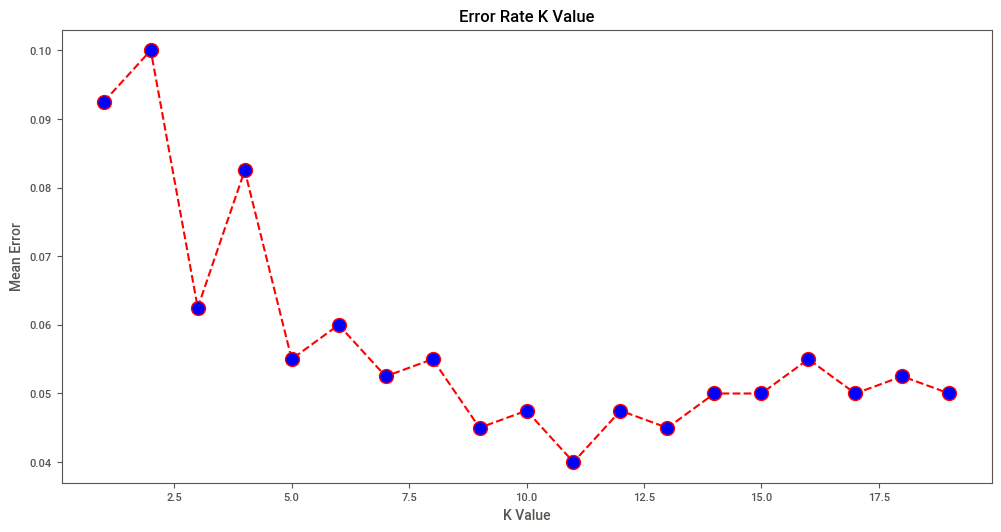

In [46]:
plt.figure(figsize=(12, 6))
plt.plot(range(1,20), error_rate, color='red', linestyle='dashed', marker='o',
         markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')
print("Minimum error:-",min(error_rate),"at K =",error_rate.index(min(error_rate))+1)

In [47]:
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error
model1=KNeighborsRegressor(n_neighbors=6,p=2)
model1.fit(x_train,y_train)
pre1=model1.predict(x_test)
train1=model1.score(x_train,y_train)
test1=model1.score(x_test,y_test)
mae1=mean_absolute_error(y_test,pre1)
mse1=mean_squared_error(y_test,pre1)
rmse1=mean_squared_error(y_test,pre1,squared=False)
print("test accuracy :",test1)
print("train accuracy :",train1)
print("MAE :",mae1)
print("MSE :",mse1)
print("RMSE :",rmse1)

test accuracy : 0.9648454711899888
train accuracy : 0.9647008699211241
MAE : 0.10875
MSE : 0.04604166666666667
RMSE : 0.21457321982639554


## Deep learning..

### 1)ANN(Artificial neural networks)


In [48]:
from sklearn.neural_network import MLPRegressor
ann=MLPRegressor(hidden_layer_sizes=(100,20,2),activation='relu',random_state=42,solver="lbfgs",max_iter=5000)
ann.fit(x_train,y_train)
p=ann.predict(x_test)
p1=ann.predict(x_train)
print("test accuracy :",r2_score(y_test,p))
print("train accuracy :",r2_score(y_train,p1))
print("MAE :",mean_absolute_error(y_test,p))
print("MSE :",mean_squared_error(y_test,p))
print("RMSE :",mean_squared_error(y_test,p,squared=False))

test accuracy : 0.9238089994395157
train accuracy : 0.9131409869632326
MAE : 0.26597357377704206
MSE : 0.09978687724031284
RMSE : 0.3158906096108475


## 9)select best accuracy

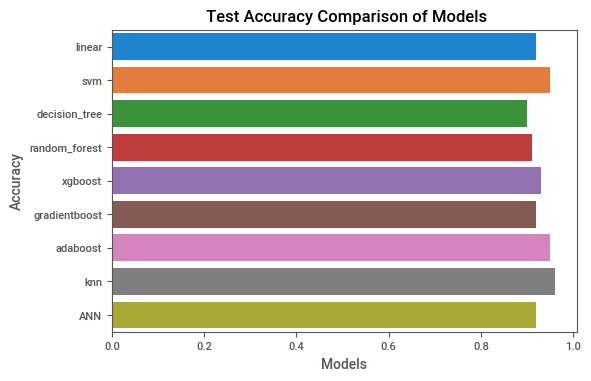

In [49]:
a=["linear","svm","decision_tree","random_forest","xgboost","gradientboost","adaboost","knn","ANN"]
b=[0.92,0.95,0.90,0.91,0.93,0.92,0.95,0.96,0.92]
sns.barplot(x=b,y=a)
plt.xlabel('Models')
plt.ylabel('Accuracy')
plt.title('Test Accuracy Comparison of Models')
plt.show()

#### above all algorithm compared to KNN give best accuracy.so, we implemented the deployment in KNN algorithm.

## 10) Deployment..

In [50]:
import pickle as pkl
pkl.dump(model1,open("mobile.pkl","wb"))
read=pkl.load(open("mobile.pkl","rb"))

In [51]:
# predict the value
independent_input_data=[510,1,2.0,1,5,1,45,0.9,168,6,16,483,754,3919,19,4,2,1,1,1]
e=read.predict([independent_input_data])[0]
print(e,"\n")
if e<=0.99:
    print("the mobile range is LOW PRICE.")
elif e<=1.99:
    print("the mobile range is MEDIUM PRICE.")
elif e<=2.99:
    print("the mobile range is HIGH PRICE.")
elif e<=3:
    print("the mobile range is VERY HIGH PRICE.")

2.6666666666666665 

the mobile range is HIGH PRICE.


#### flask url link created does not support in jupyter notebook.so,we write the code in pycharm IDE and visual studio.